<a href="https://colab.research.google.com/github/harim0207/KampenTeam/blob/Rathziel/Rathziel_Satellite_Imagery_Download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio
import ee
import numpy as np
import matplotlib.pyplot as plt
import rasterio 
import os

     |████████████████████████████████| 18.1MB 1.3MB/s 


In [ ]:
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=5p9oyTDKH2_auwQY1sYNbaMHZkGCznhtXgcTpXOQS1c&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/5AGCa3eV-gkQvsHAi21mwGqZklU35yaj75MwO6zpSJQDyUpEcRClTpQ

Successfully saved authorization token.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### The authenticate step only needs to be run once. After that you can comment it out and only run the initialize step. 
### It does require that you authorize your Google account to use Earth Engine prior to running the authentication. 
#ee.Authenticate()
#ee.Initialize()

### This snipped chooses an image collection for a specific point and date range and then sorts it by how cloudy the image may be. 
### NOTE: not all images have the same parameters for things like clouds. It's a good idea to check the image set parameters to make sure you're passing the correct argument. 
#### USDA/NAIP/DOQQ <-- Resolution of 1m
#### COPERNICUS/S2_SR
img_set = ee.ImageCollection('USDA/NAIP/DOQQ')\
    .filterBounds(ee.Geometry.Point(-86.92728607361477, 40.441409940237406))\
    .filterDate('2014-07-03', '2020-01-01')\
    .sort('CLOUD_SHADOW_PERCENTAGE')

### Prints the number of available images from the image set code above. 
print("We have {} images for this point.".format(img_set.size().getInfo()))

### Prints the bands that are available for the images. This will change based on the image types. 
print(img_set.first().bandNames().getInfo())

### If the image has information on clouds this will print how cloudy the least cloud image is (we sorted based on clouds above).
### NOTE: if you expect this to return a value and it returns None check to make sure you passed the correct parameter for clouds. 
print(img_set.first().get('CLOUD_SHADOW_PERCENTAGE').getInfo())

### This code is primarily just for reference. It prints out the different keys that are available for each data set and then specifically the parameters that are available. 
### The parameter information can also be found in the online documentation, but sometimes it can be helpful to get to it programatically. 
print(img_set.first().getInfo().keys())
print(img_set.first().getInfo()['properties'].keys())

listOfImages = img_set.toList(img_set.size());
dummy_image = ee.Image(listOfImages.get(0))
img1 = dummy_image.select(['R', 'G', 'B'])

### Selecting the least cloudy image and the associated bands that we would like for the image set. 
### NOTE: bands also change based on the image set that you are using. Make sure to update them as needed. 
single_image = ee.Image(img_set.first()).select('R', 'G', 'B')  # Changed the values to match the ones on the Earth Engine Site



We have 3 images for this point.
['R', 'G', 'B', 'N']
None
dict_keys(['type', 'bands', 'version', 'id', 'properties'])
dict_keys(['system:time_start', 'system:footprint', 'system:time_end', 'system:asset_size', 'system:index'])


There are 316 images containing the Kampen Golf Course site for COPERNICUS/S2_SR. We may use them for image augmentation 

In [ ]:
#Half of the Kampen course
#geometry = ee.Geometry.Polygon([[[-86.92945177370206,40.43879148232168],[-86.92438776308194,40.43879148232168],[-86.92438776308194,40.446074901014654],[-86.92945177370206,40.446074901014654],[-86.92945177370206,40.43879148232168]]]);
#Lower part of the Kampen course
#geometry = ee.Geometry.Polygon([[[-86.93402690171587,40.438773076669165],[-86.92432803391802,40.438773076669165],[-86.92432803391802,40.4460891566582],[-86.93402690171587,40.4460891566582],[-86.93402690171587,40.438773076669165]]]);


geometry = ee.Geometry.Polygon([[[-86.93166655778276,40.44599117870479],[-86.92171019791948,40.44599117870479],[-86.92171019791948,40.45183694661751],[-86.93166655778276,40.45183694661751],[-86.93166655778276,40.44599117870479]]]);


task = ee.batch.Export.image.toDrive(image = img1,     
                             region = geometry,
                             description='West_Lafayette_1005_NAIP_Upper',
                             folder='kempen_folder',
                             fileFormat= 'GeoTIFF',
                             scale= 2)

task.start()

In [ ]:

os.chdir("/content/drive/My Drive/kempen_folder") # Locates the directory to the folder in the drive
!ls

 KempenHalfScale2.tif		 West_Lafayette_1005_NAIP_Complete.tif
 KempenHalf.tif			 West_Lafayette_1005_NAIP.tif
'KempenZoomOutscale30 (1).tif'	 West_Lafayette_1005_NAIP_Upper.tif
 KempenZoomOutscale30.tif	 West_Lafayette_1005.tif
 KempenZoomOutscale30V2.tif	 WEst_Lafayette.tif
 KempenZoomOut.tif


In [ ]:
with rasterio.open('West_Lafayette_1005_NAIP_Upper.tif') as src:
    data = src.read((1, 2, 3))
    band1 = src.read(1)
    band2 = src.read(2)
    band3 = src.read(3)


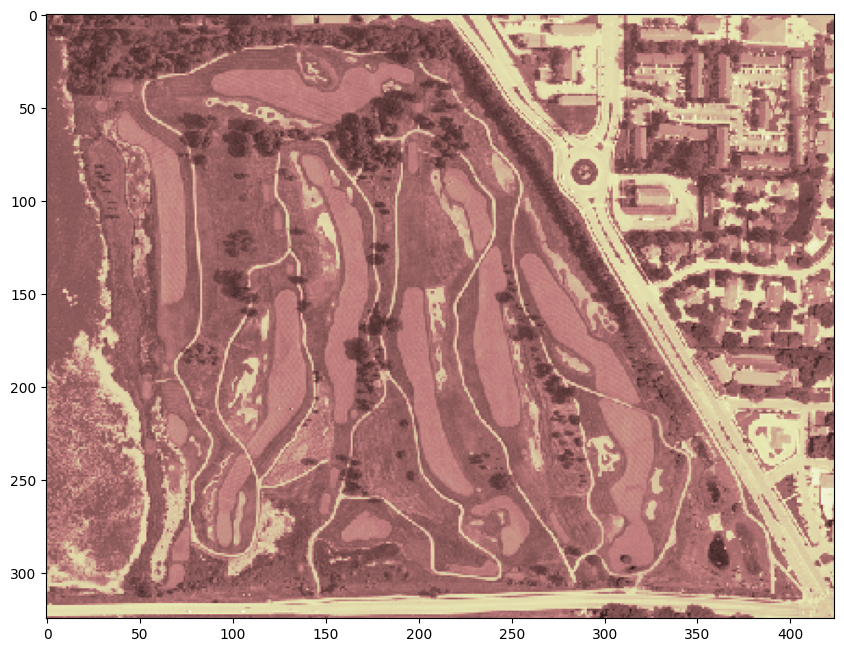

In [ ]:
 fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
 plt.imshow(band3, cmap='pink')

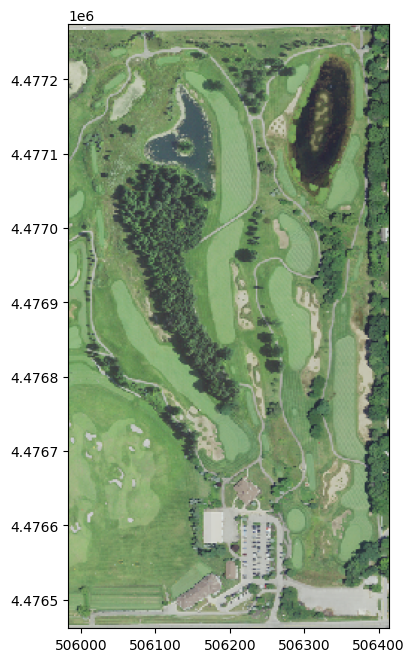

In [ ]:
from rasterio.plot import show
src = rasterio.open("West_Lafayette_1005_NAIP.tif") ##,cmap='pink'
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
show(src)

In [ ]:
type(src)

rasterio.io.DatasetReader

In [ ]:
rgb = np.dstack((band1,band2,band3))  # stacks 3 h x w arrays -> h x w x 3

In [ ]:
import cv2
edges = cv2.Canny(rgb,100,200)

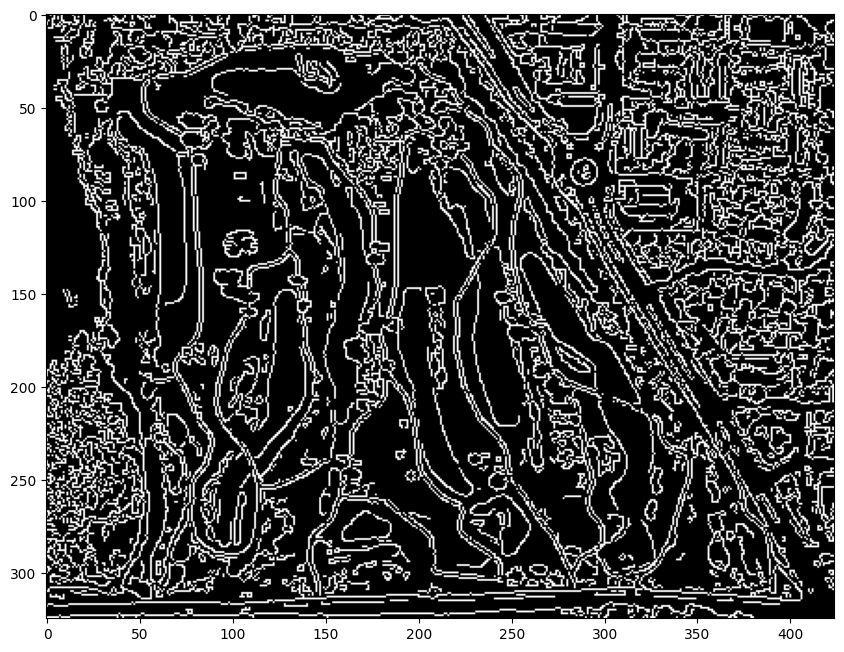

In [ ]:
 rgb_bilateral = cv2.bilateralFilter(rgb, 7, 30, 50)
 edges = cv2.Canny(rgb_bilateral,100,190)
 fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
 plt.imshow(edges, cmap = 'gray')

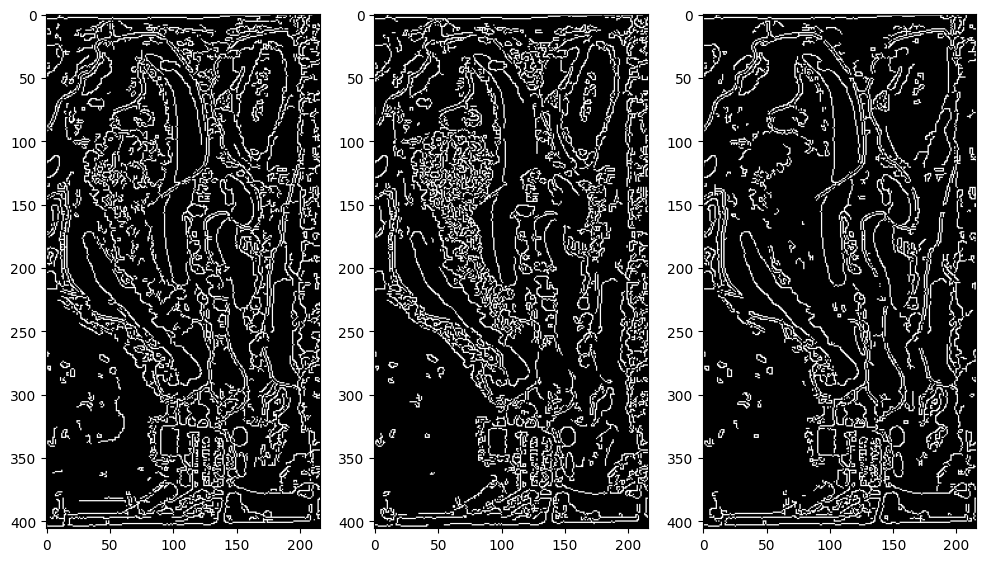

In [ ]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(131)
edges1 = cv2.Canny(band1,100,200)
plt.imshow(edges1,cmap = 'gray')
plt.subplot(132)
edges2 = cv2.Canny(band2,100,200)
plt.imshow(edges2,cmap = 'gray')
plt.subplot(133)
edges3 = cv2.Canny(band3,100,200)
plt.imshow(edges3,cmap = 'gray')

In [ ]:
### Get a URL to download the set of images specified in the previous line above. You don't need to worry too much about the coordinate reference system (CRS), but the region can be updated as needed. 
### NOTE: This will still give you a full satellite image. You will need to clip the image to your area of interest (aoi) for analysis. 
### NOTE2: As mentioned this method also has a limit based on the amount you are trying to download. The toDrive() funtionality may be easier to use for larger data sets. 
"""path = single_image.getDownloadURL({
    'scale': 100,
    'crs': 'EPSG:4326',
    'region': '[[-87.23631663658007,40.23723427643959], [-86.55791087486132,40.23723427643959], [-86.55791087486132,40.60107238853754],\
     [-87.23631663658007,40.60107238853754], [-87.23631663658007,40.23723427643959]]'
})
print(path)"""
